# **Importing Dependencies**

In [2]:
# Basic libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use("ggplot")
from wordcloud import WordCloud

# Libraries for text processing and regular expressions
import re
import string
import time
from bs4 import BeautifulSoup

# NLP libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data files
nltk.download("punkt")         # Word tokenization
nltk.download("stopwords")     # Stop words list
nltk.download('wordnet')       # WordNet for lemmatization
nltk.download('omw-1.4')       # Additional data for WordNet

# Stemming and Lemmatization tools
from nltk.stem import WordNetLemmatizer

# Libraries for feature extraction and data splitting
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Import TensorFlow and Keras for building deep learning models
import tensorflow as tf
from keras.callbacks import EarlyStopping  # For stopping training early
from tensorflow.keras.optimizers import Adam  # Adam optimizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, SimpleRNN, LSTM, GRU, Bidirectional, BatchNormalization


# Deep Learning libraries for text tokenization and sequence padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences to a uniform length

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# !pip install wordcloud

# **Importing Dataset and Preprocessing**

In [4]:
df=pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='latin', header=None)
df.sample(10)


,0,1,2,3,4,5
1548392,4,2183020817,Mon Jun 15 13:56:32 PDT 2009,NO_QUERY,miss_r,@xChix Who's Juliana?
746475,0,2283025804,Mon Jun 22 12:06:30 PDT 2009,NO_QUERY,MissJessica7,"Thanks to my parents, up WAY earlier than I wa..."
910624,4,1751645909,Sat May 09 19:56:22 PDT 2009,NO_QUERY,vallih,"DW, that was funny"
331250,0,2012619425,Tue Jun 02 20:59:04 PDT 2009,NO_QUERY,Org_XIII,So pruney... My Hands....
1390208,4,2053199340,Sat Jun 06 03:39:49 PDT 2009,NO_QUERY,porky01,watched Ghosts of Girlfriends Past.
333595,0,2013381613,Tue Jun 02 22:32:25 PDT 2009,NO_QUERY,jordinx3,just woke up from a nightmare cant fall back ...
417363,0,2061521493,Sat Jun 06 21:02:38 PDT 2009,NO_QUERY,medras_13,@Laura91 Lame! I need to take summer classes too
441078,0,2066913868,Sun Jun 07 11:24:20 PDT 2009,NO_QUERY,youmeatrachel,@auditiondanny ahh don't be sad BE HAPPY! pl...
1590127,4,2191341912,Tue Jun 16 05:04:21 PDT 2009,NO_QUERY,illutic,@DeFries #wowwp = Women on the Web WordPress ...
1063008,4,1964353089,Fri May 29 14:06:08 PDT 2009,NO_QUERY,Eyglo,@serenebabe haha I can imagine - used to close...


In [5]:
df.columns = ['sentiment', 'Id', 'Date', 'Query', 'User_id', 'text']
df.head()

,sentiment,Id,Date,Query,User_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.shape

(1600000, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Query      1600000 non-null  object
 4   User_id    1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
print("Number Of Duplicates Is: ",df.duplicated().sum())

Number Of Duplicates Is:  0


In [9]:
df['sentiment'].nunique()

2

In [10]:
df['sentiment'].unique()

array([0, 4])

In [11]:
df['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

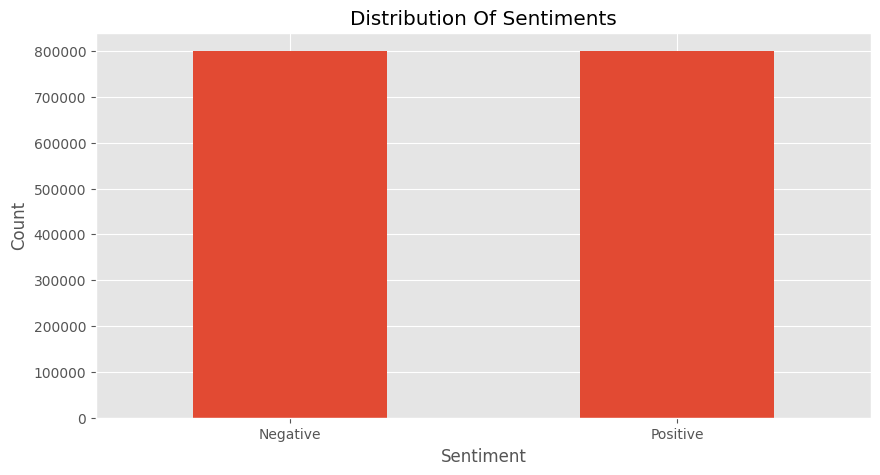

In [12]:
ax=df['sentiment'].value_counts().sort_values().plot(
    kind='bar',
    title="Distribution Of Sentiments",
    figsize=(10,5)
)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
plt.show()

#  mapping "positive" --> 1 and negative --> 0 and drop all unnecessary columns.

In [13]:
# Select only the 'sentiment' and 'text' columns
df = df[['sentiment', 'text']]

# Replace 4 with 1 in the 'sentiment' column
df['sentiment'] = df['sentiment'].replace(4, 1)


In [14]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [15]:
df['text'][50]

"Broadband plan 'a massive broken promise' http://tinyurl.com/dcuc33 via www.diigo.com/~tautao Still waiting for broadband we are "

# Exploring The Target Column `sentiment`

In [16]:
df['sentiment'].value_counts()

sentiment
0    800000
1    800000
Name: count, dtype: int64

In [17]:
df['sentiment'].nunique()

2

In [18]:
df['sentiment'].unique()

array([0, 1])

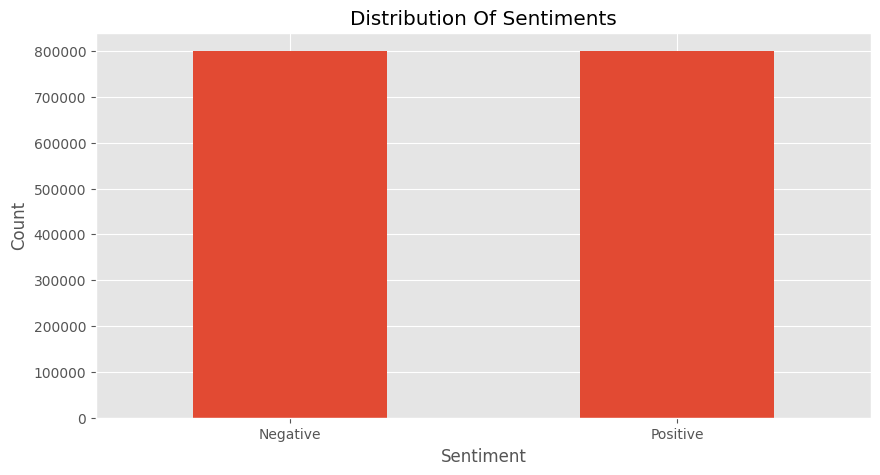

In [19]:
ax=df['sentiment'].value_counts().sort_values().plot(
    kind='bar',
    title="Distribution Of Sentiments",
    figsize=(10,5)
)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)  
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count") 
plt.show()

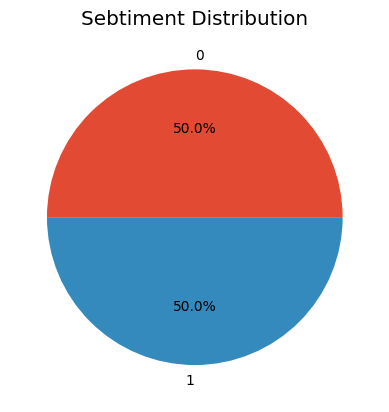

In [20]:
sentiment_values=df['sentiment'].value_counts()
plt.pie(sentiment_values,labels=sentiment_values.index, autopct='%1.1f%%')
plt.title("Sebtiment Distribution")
plt.show()

# From the output, it is clear that the dataset contains equal number of positive and negative reviews

In [21]:
# taking a sample from the dataset
df = df.groupby('sentiment').apply(lambda x: x.sample(75000, random_state=42)).reset_index(drop=True)

In [22]:
df['sentiment'].value_counts()

sentiment
0    75000
1    75000
Name: count, dtype: int64

In [23]:
positive_count=len(df['sentiment']==1)
negative_count=len(df['sentiment']==0)

In [24]:
fig=px.pie(
values=[positive_count,negative_count],
    names=['Positive','Negative'],
    hover_name=['Positive','Negative'],
    title='Distribution of sentiments',
    opacity=0.9,
    template='plotly_white'

)
fig.update_layout(width=600,height=500)
fig.show()

# we'll start text preprocessing steps:

# we will define a function that takes a text string as a parameter and then performs preprocessing on the string  

>1. Convert to Lowercase: Convert the entire text to lowercase, To standardize the text so that words are treated equally regardless of their case. 
>2. Remove Special Characters, Usernames, and Hyperlinks: To eliminate unwanted characters that do not contribute to the meaning of the text..
>3. Remove Stopwords: Filter out common stopwords,that do not add significant meaning to the text.
>4. Lemmatize the Text: Convert words to their base forms.
>5. Joining Tokens: To reconstruct the processed text from the list of lemmatized tokens.

In [25]:
def preprocess_text(text):
	soup = BeautifulSoup(text, "html.parser")
	text = re.sub(r'\[[^]]*\]', '', soup.get_text())
	pattern = r"[^a-zA-Z0-9\s,']"
	text = re.sub(pattern, '', text)
	return text

In [26]:
# Apply the preprocessing function to the DataFrame
df['text']=df['text'].apply(preprocess_text)

In [27]:
df.sample(10)

,sentiment,text
12934,0,OMG Transformers comes out tonite I'm tryin...
76182,1,Listening to Sia calming me down About to get ...
26739,0,Leanne0710 they horny kittys have been followi...
128613,1,got to level 10 on tetris it's school tomorrow...
73170,0,just for back from track practise and fricken ...
95052,1,dreamhampton Yes by far To this day before I g...
63971,0,I'm not sure if this is working told you I do...
45379,0,i miss youu tooo kblovesyouu you just called m...
97710,1,"campusrock war cool, ja schon"
57052,0,"LouiseMayes Oh really, this nice weather is le..."


In [28]:
df['text'][50]

'Meeting fail, nothing resolved Going to be a rough week '

In [29]:
df['word_length']=df['text'].apply(lambda x:len(x.split()))

df.head()

,sentiment,text,word_length
0,0,xnausikaax oh no where did u order from that's...,10
1,0,A great hard training weekend is over a coupl...,25
2,0,"Right, off to work Only 5 hours to go until I...",13
3,0,I am craving for japanese food,6
4,0,Jean Michel Jarre concert tomorrow gotta work...,10


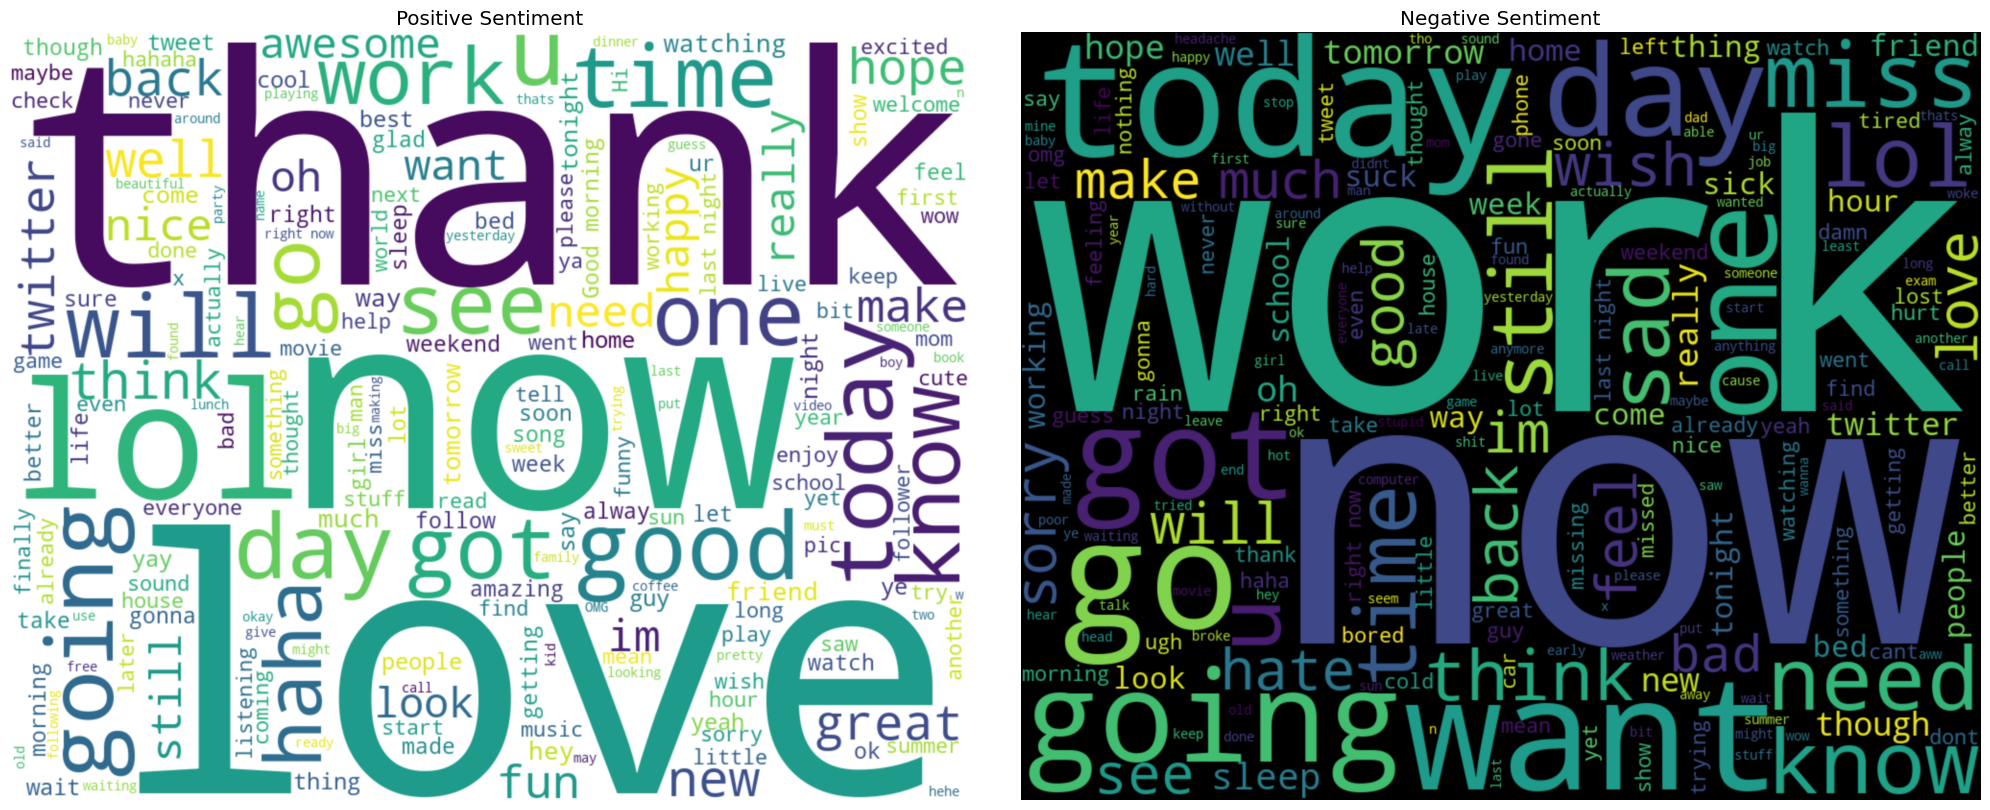

In [30]:
# Set the figure size for the plots
plt.figure(figsize=(20, 10))

# Create the first subplot for the positive sentiment word cloud
plt.subplot(1, 2, 1)

# Generate a word cloud for positive sentiments by joining all preprocessed texts labeled as '1'
wordcloud_pos = WordCloud(height=800, width=1000, background_color='white', random_state=42).generate(' '.join( word for word in df['text'][df['sentiment']==1]))

# Display the word cloud image
plt.imshow(wordcloud_pos, interpolation='bicubic')

# Set the title for the positive word cloud
plt.title("Positive Sentiment")

plt.axis("off")
# Create the second subplot for the negative sentiment word cloud
plt.subplot(1, 2, 2)
# Generate a word cloud for negative sentiments by joining all preprocessed texts labeled as '0'
wordcloud_neg = WordCloud(height=800, width=1000, background_color='black', random_state=42).generate(' '.join( word for word in df['text'][df['sentiment']==0]))
# Display the word cloud image
plt.imshow(wordcloud_neg, interpolation='bicubic')
# Set the title for the negative word cloud
plt.title("Negative Sentiment")

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.axis("off")

plt.xticks([])
plt.yticks([])
plt.show()

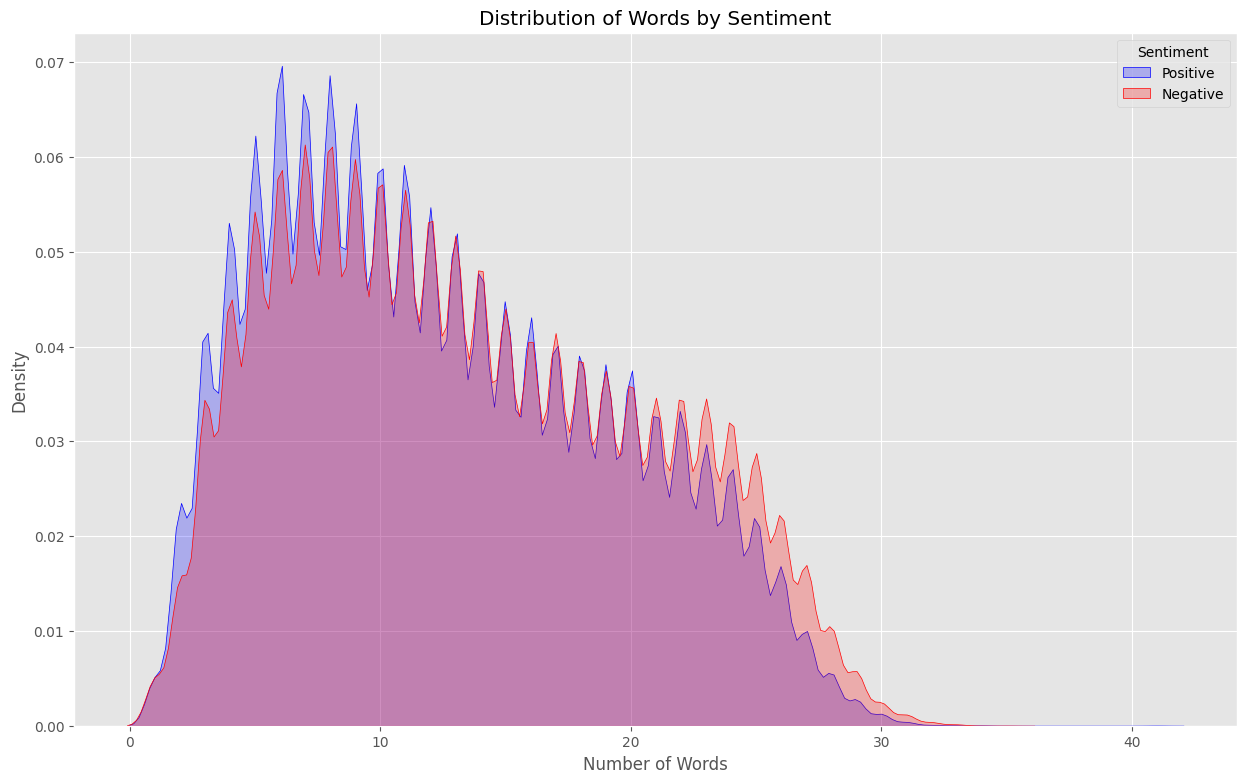

In [31]:
# Set up the plot size
plt.figure(figsize=(15, 9))

# Plot KDE for Positive sentiment
sns.kdeplot(df[df['sentiment'] == 1]['word_length'], label='Positive', color='blue', fill=True, bw_adjust=0.5)

# Plot KDE for Negative sentiment
sns.kdeplot(df[df['sentiment'] == 0]['word_length'], label='Negative', color='red', fill=True, bw_adjust=0.5)

# Update plot aesthetics
plt.title("Distribution of Words by Sentiment")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()


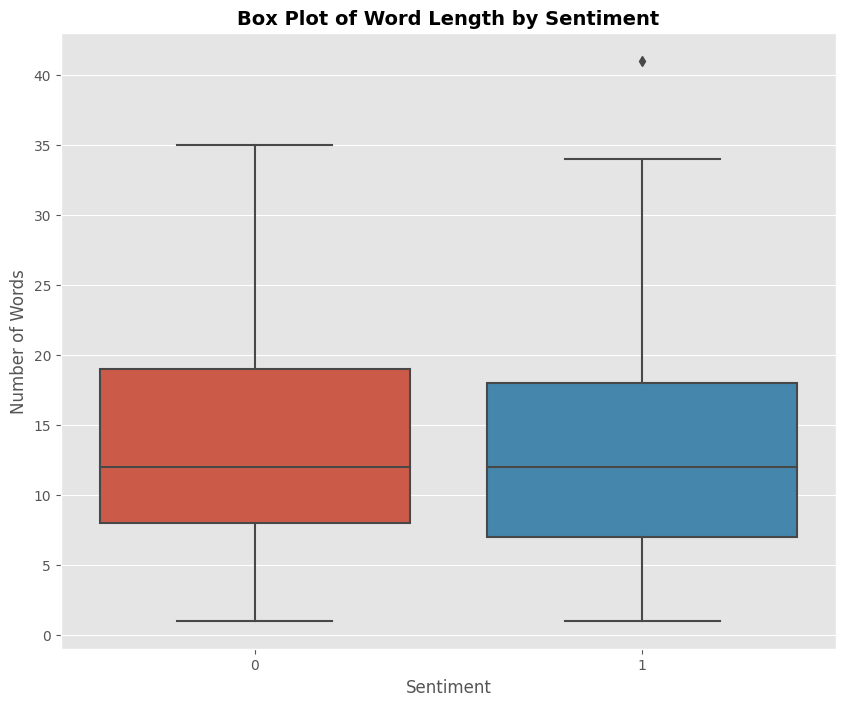

In [62]:

# # Create a box plot for word length distribution by sentiment
# fig = px.box(df, x='sentiment', y='word_length', title='Box Plot of Word Length by Sentiment')

# # Update layout to center the title and make it bold
# fig.update_layout(
#     title=dict(text='<b>Box Plot of Word Length by Sentiment</b>', x=0.5),
#     xaxis_title='Sentiment',
#     yaxis_title='Number of Words'
# )

# # Show the plot
# fig.show()
# Set up the figure
plt.figure(figsize=(10, 8))

# Create a box plot using Seaborn
sns.boxplot(x='sentiment', y='word_length', data=df)

# Update plot labels and title
plt.title('Box Plot of Word Length by Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')

# Show the plot
plt.show()

# **Splitting Data**

In [33]:
# Splitting the data into train, validation, and test sets
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Set number of words to keep
num_words =10000

# One-Hot Encoding
ohe = CountVectorizer(binary=True, max_features=num_words)  # Initialize CountVectorizer for one-hot encoding with a max vocabulary size
ohe.fit(X)  # Fit the one-hot encoder on the entire dataset
X_train_ohe = ohe.transform(X_train).toarray()  # Transform training data to one-hot encoded array
X_val_ohe = ohe.transform(X_val).toarray()  # Transform validation data to one-hot encoded array
X_test_ohe = ohe.transform(X_test).toarray()  # Transform test data to one-hot encoded array

# Bag of Words (BoW) Representation
bow = CountVectorizer(binary=False, max_features=num_words)  # Initialize CountVectorizer for BoW representation
bow.fit(X)  # Fit the BoW model on the entire dataset
X_train_bow = bow.transform(X_train)  # Transform training data to BoW representation
X_val_bow = bow.transform(X_val)  # Transform validation data to BoW representation
X_test_bow = bow.transform(X_test)  # Transform test data to BoW representation

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=num_words)  # Initialize TfidfVectorizer with a max vocabulary size
tfidf.fit(X)  # Fit the TF-IDF model on the entire dataset
X_train_tfidf = tfidf.transform(X_train).toarray()  # Transform training data to TF-IDF representation
X_val_tfidf = tfidf.transform(X_val).toarray()  # Transform validation data to TF-IDF representation
X_test_tfidf = tfidf.transform(X_test).toarray()  # Transform test data to TF-IDF representation


# Tokenization and Padding
max_len = 25  # Set maximum length for sequences to 25 words
tokenizer = Tokenizer(num_words=num_words)  # Initialize the tokenizer, limiting to num_words (e.g., 5000)
tokenizer.fit_on_texts(X)  # Fit the tokenizer on the training data to build the word index
word_index = tokenizer.word_index  # Retrieve the word-to-index dictionary

# Convert training, validation, and test texts to sequences of integers based on the word index
X_train_seq = tokenizer.texts_to_sequences(X_train)  # Convert training texts to sequences
X_val_seq = tokenizer.texts_to_sequences(X_val)  # Convert validation texts to sequences
X_test_seq = tokenizer.texts_to_sequences(X_test)  # Convert test texts to sequences

# Pad the sequences to ensure uniform input size for the model
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')  # Pad training sequences
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')  # Pad validation sequences
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')  # Pad test sequences


In [34]:
# Load GloVe embeddings
embeddings_dictionary = {}
with open('/kaggle/input/glove6b100dtxt/glove.6B.100d.txt', encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

# Create embedding matrix
embedding_dim = 100  # Using 100-dimensional GloVe embeddings
vocab_size = min(num_words, len(tokenizer.word_index) + 1)  # Adjust vocab size if necessary
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, index in tokenizer.word_index.items():
    if index < num_words:  # Only consider words in the top num_words
        embedding_vector = embeddings_dictionary.get(word)
        if embedding_vector is not None and len(embedding_vector) == embedding_dim:
            embedding_matrix[index] = embedding_vector

In [35]:
# Initialize the model
glstm_model = Sequential()

# Embedding layer (converts text to dense vector representations)
embedding_layer = Embedding(vocab_size, 100,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)
glstm_model.add(embedding_layer)

# Bidirectional LSTM layer
glstm_model.add(Bidirectional(LSTM(128, return_sequences=True)))  # Keep return_sequences=True
glstm_model.add(Dropout(0.5))  # Dropout layer for regularization

# Second Bidirectional LSTM layer
glstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
glstm_model.add(Dropout(0.5))  # Additional dropout for regularization

# Third Bidirectional LSTM layer with return_sequences=False
glstm_model.add(Bidirectional(LSTM(32)))
glstm_model.add(Dropout(0.6))

# Fully connected layer with ReLU activation
glstm_model.add(Dense(64, activation='relu'))
glstm_model.add(BatchNormalization())

# Output layer for binary classification
glstm_model.add(Dense(1, activation='sigmoid'))

# Display the model summary
glstm_model.summary()

# Compile the model with Adam optimizer and binary cross-entropy loss
glstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = glstm_model.fit(X_train_pad, y_train, batch_size=512, epochs=17, verbose=1, validation_data=(X_val_pad, y_val))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/17
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5676 - loss: 0.7251 - val_accuracy: 0.6972 - val_loss: 0.6412
Epoch 2/17
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.6758 - loss: 0.6138 - val_accuracy: 0.7117 - val_loss: 0.5727
Epoch 3/17
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.6979 - loss: 0.5824 - val_accuracy: 0.7190 - val_loss: 0.5479
Epoch 4/17
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.7099 - loss: 0.5663 - val_accuracy: 0.7202 - val_loss: 0.5465
Epoch 5/17
206/206 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7197 - loss: 0.5536 - val_accuracy: 0.7289 - val_loss: 0.5357
Epoch 6/17
206/206 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7313 - loss: 0.5383 - val_accuracy: 0.7301 - val_loss: 0.5361
Epoch 7/17
206/206 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7397 - loss: 0.5290 - val_accuracy: 0.7432 - val_loss: 0.5174
Epoch 8/17
206/206 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7469 - loss: 0.5182 - val_acc

In [36]:
def evaluate_model(model, X_data, y_data):
    """
    Evaluate the model on the given data.
    Parameters:
    model: The trained model to evaluate.
    X_data: The input features for evaluation.
    y_data: The true labels for evaluation.
    Returns:
    loss: The loss value.
    accuracy: The accuracy value.
    """
    loss, accuracy = model.evaluate(X_data, y_data, batch_size=128)
    return loss, accuracy


In [37]:
# Evaluate the model on the training data
train_loss, train_accuracy = evaluate_model(glstm_model, X_train_pad, y_train)

# Evaluate the model on the validation data
val_loss, val_accuracy = evaluate_model(glstm_model, X_test_pad, y_test)

# Print the results
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

821/821 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7696 - loss: 0.4810
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7628 - loss: 0.4992
Training Loss: 0.4799205958843231
Training Accuracy: 0.7720857262611389
Validation Loss: 0.4958477020263672
Validation Accuracy: 0.7623999714851379


In [38]:
def plot_graphs(history, string):
    plt.plot(history.history[string])  # Plot training metrics
    plt.plot(history.history['val_' + string])  # Plot validation metrics
    plt.xlabel('Epochs')  # Label for the x-axis
    plt.ylabel(string)  # Label for the y-axis
    plt.legend([string, 'val_' + string])  # Create a legend to distinguish training and validation
    plt.show()  # Display the plot

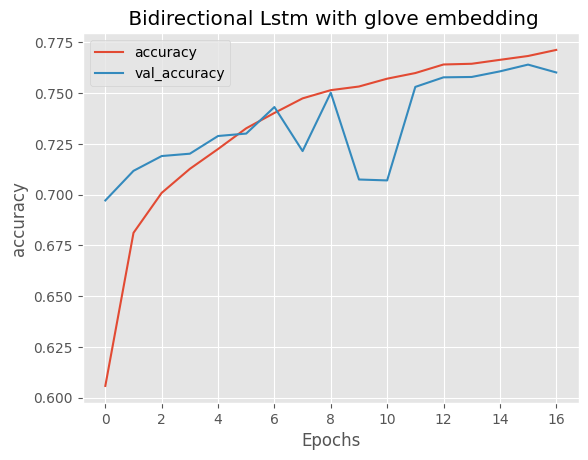

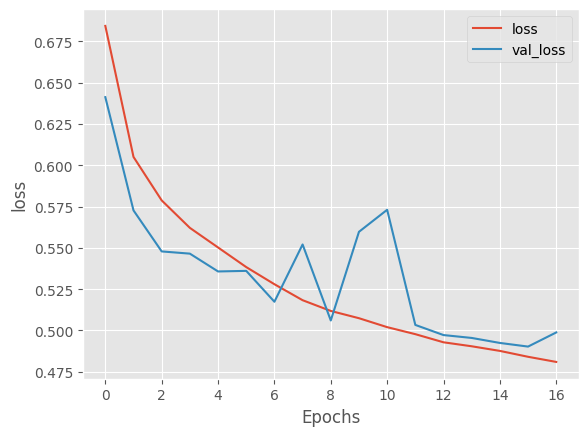

In [39]:
# Plot training and validation accuracy
plt.title(' Bidirectional Lstm with glove embedding')
plot_graphs(history, 'accuracy')

# Plot training and validation loss
plot_graphs(history, 'loss')

In [40]:
# Define the MLP model
mlp_model = Sequential()  # Initialize a sequential model

# Add the first hidden layer with 512 neurons and ReLU activation
mlp_model.add(Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1], )))
mlp_model.add(BatchNormalization())  # Normalize the activations
mlp_model.add(Dropout(0.5))  # Apply dropout to prevent overfitting

# Add the second hidden layer with 128 neurons and ReLU activation
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.5))

# Add the third hidden layer with 32 neurons and ReLU activation
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.5))
# Add the output layer with 1 neuron and sigmoid activation for binary classification
mlp_model.add(Dense(1, activation='sigmoid'))

# Initialize the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model
mlp_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

mlp_model.summary()
# Set up early stopping to monitor validation loss and prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training configuration
epochs = 10
batch_size = 512

# Fit the model on the training data with validation
history = mlp_model.fit(X_train_tfidf, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val_tfidf, y_val),
                        callbacks=[early_stopping])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,193,025 (19.81 MB)

 Trainable params: 5,191,681 (19.80 MB)

 Non-trainable params: 1,344 (5.25 KB)

Epoch 1/10


I0000 00:00:1730869506.417520    2006 service.cc:145] XLA service 0x7a674c22f530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730869506.417594    2006 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730869506.417603    2006 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 13/206 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5030 - loss: 1.0721

I0000 00:00:1730869511.782685    2006 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


206/206 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.5377 - loss: 0.9714 - val_accuracy: 0.4963 - val_loss: 0.8391
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6345 - loss: 0.7439 - val_accuracy: 0.5048 - val_loss: 0.7371
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6917 - loss: 0.6343 - val_accuracy: 0.6592 - val_loss: 0.5912
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7260 - loss: 0.5728 - val_accuracy: 0.7424 - val_loss: 0.5142
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7503 - loss: 0.5294 - val_accuracy: 0.7587 - val_loss: 0.4965
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7684 - loss: 0.4963 - val_accuracy: 0.7666 - val_loss: 0.4894
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7823 - loss: 0.4731 - val_accuracy: 0.7687 - val_loss: 0.4849
Epoch 8/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7961 - loss: 0.4450 - val_accuracy: 0.77

In [41]:
# Evaluate the model on the training data
train_loss, train_accuracy = evaluate_model(mlp_model, X_train_tfidf, y_train)

# Evaluate the model on the validation data
val_loss, val_accuracy = evaluate_model(mlp_model, X_test_tfidf, y_test)

# Print the results
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


821/821 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8492 - loss: 0.3480
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7672 - loss: 0.4783
Training Loss: 0.3477531969547272
Training Accuracy: 0.8496285676956177
Validation Loss: 0.48063763976097107
Validation Accuracy: 0.7675555348396301


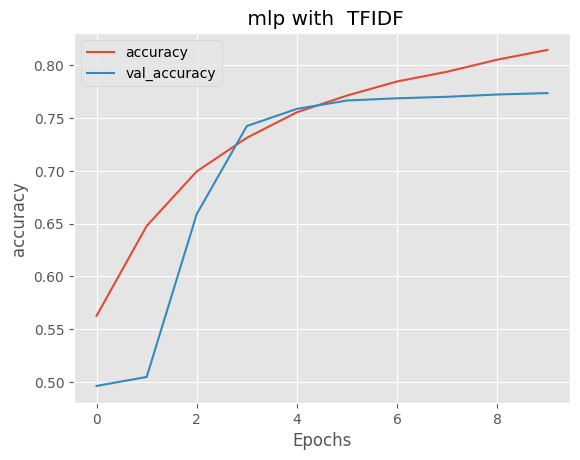

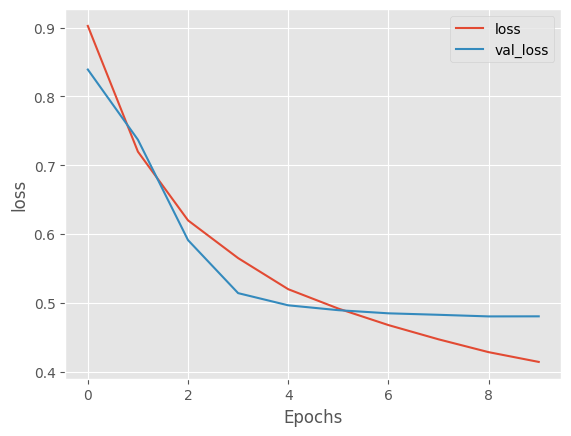

In [42]:
# Plot training and validation accuracy
plt.title(' mlp with  TFIDF')
plot_graphs(history, 'accuracy')

# Plot training and validation loss
plot_graphs(history, 'loss')

In [43]:
# Initialize a sequential model for a neural network
mlp_ohe_model = Sequential()

mlp_ohe_model.add(Dense(512, activation='relu', input_shape=(X_train_ohe.shape[1],)))
mlp_ohe_model.add(Dense(128, activation='relu'))

mlp_ohe_model.add(Dense(32, activation='relu'))

mlp_ohe_model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary crossentropy loss, Adam optimizer, and accuracy as a metric
mlp_ohe_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


epochs = 10
batch_size = 512

# Fit the model on the one-hot encoded training data, using validation data and early stopping
history = mlp_ohe_model.fit(X_train_ohe, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_ohe, y_val), callbacks=[early_stopping])


Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.7309 - loss: 0.5485 - val_accuracy: 0.7831 - val_loss: 0.4590
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8431 - loss: 0.3567 - val_accuracy: 0.7787 - val_loss: 0.4847
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9293 - loss: 0.1871 - val_accuracy: 0.7692 - val_loss: 0.6666
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9742 - loss: 0.0750 - val_accuracy: 0.7666 - val_loss: 0.9658


In [45]:
# Evaluate the model on the training data
train_loss, train_accuracy = evaluate_model(mlp_ohe_model, X_train_ohe, y_train)

# Evaluate the model on the validation data
val_loss, val_accuracy = evaluate_model(mlp_ohe_model, X_test_ohe, y_test)

# Print the results
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


821/821 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8428 - loss: 0.3719
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7825 - loss: 0.4539
Training Loss: 0.3713001608848572
Training Accuracy: 0.8438857197761536
Validation Loss: 0.4552420675754547
Validation Accuracy: 0.7828888893127441


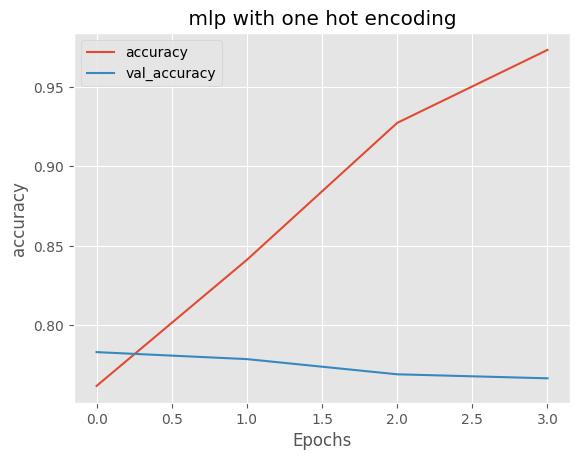

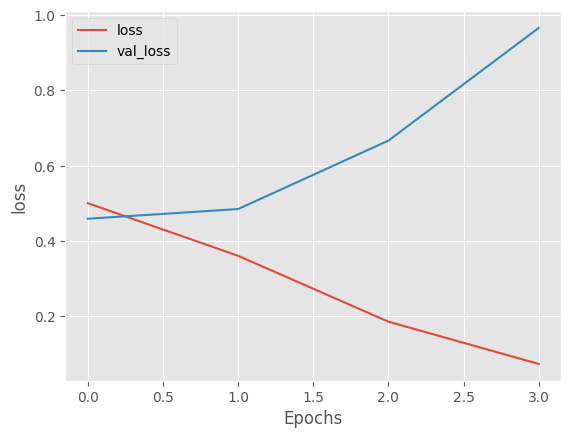

In [46]:
# Plot training and validation accuracy
plt.title(' mlp with one hot encoding ')
plot_graphs(history, 'accuracy')

# Plot training and validation loss
plot_graphs(history, 'loss')

In [47]:
# Initialize the model
tf_rnn_model = Sequential()

# Input layer and first hidden layer
tf_rnn_model.add(Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
tf_rnn_model.add(BatchNormalization())
tf_rnn_model.add(Dropout(0.5))

# Second hidden layer
tf_rnn_model.add(Dense(128, activation='relu'))
tf_rnn_model.add(BatchNormalization())
tf_rnn_model.add(Dropout(0.5))

# Third hidden layer
tf_rnn_model.add(Dense(32, activation='relu'))
tf_rnn_model.add(Dropout(0.5))

# Output layer
tf_rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
tf_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set epochs and batch size
epochs = 10
batch_size = 512



# Fit the model
history = tf_rnn_model.fit(X_train_tfidf, y_train, epochs=epochs, batch_size=batch_size,
                           validation_data=(X_val_tfidf, y_val), callbacks=[early_stopping])

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.6272 - loss: 0.7987 - val_accuracy: 0.7281 - val_loss: 0.6681
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7779 - loss: 0.4719 - val_accuracy: 0.7753 - val_loss: 0.5934
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8122 - loss: 0.4174 - val_accuracy: 0.7764 - val_loss: 0.4836
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8338 - loss: 0.3714 - val_accuracy: 0.7731 - val_loss: 0.4889
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8607 - loss: 0.3196 - val_accuracy: 0.7706 - val_loss: 0.5474
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8828 - loss: 0.2730 - val_accuracy: 0.7668 - val_loss: 0.6017


In [48]:
# Evaluate the model on the training data
train_loss, train_accuracy = evaluate_model(tf_rnn_model, X_train_tfidf, y_train)

# Evaluate the model on the validation data
val_loss, val_accuracy = evaluate_model(tf_rnn_model, X_test_tfidf, y_test)

# Print the results
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

821/821 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8531 - loss: 0.3923
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7713 - loss: 0.4837
Training Loss: 0.3924139142036438
Training Accuracy: 0.8541333079338074
Validation Loss: 0.4823756814002991
Validation Accuracy: 0.7724888920783997


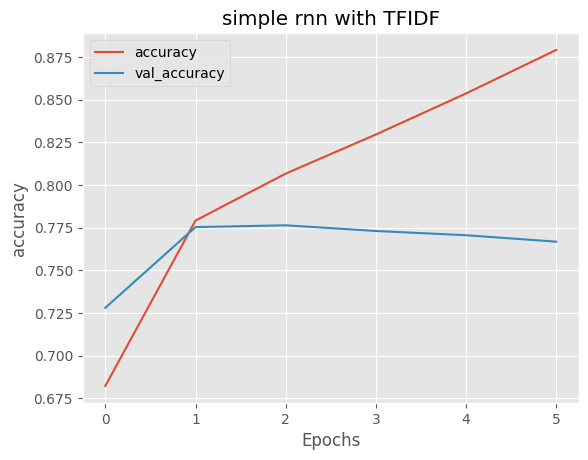

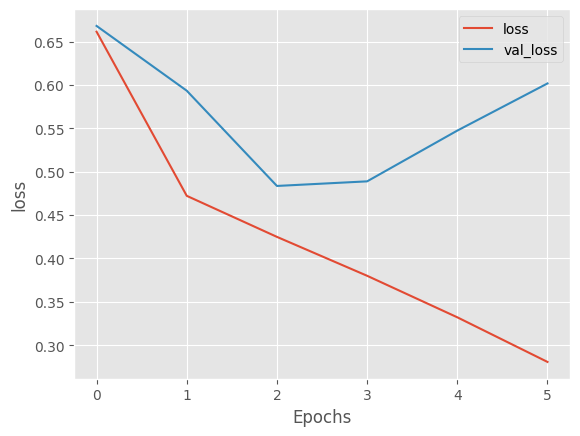

In [49]:
# Plot training and validation accuracy
plt.title('simple rnn with TFIDF')
plot_graphs(history, 'accuracy')

# Plot training and validation loss
plot_graphs(history, 'loss')

In [50]:
# Function to create and compile LSTM model
def lstm_model():
    # Initialize a sequential model
    model = Sequential()

    # Add an embedding layer
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=25))

    # Add an LSTM layer with 100 units and a dropout rate of 0.2; return sequences for the next LSTM layer
    model.add(LSTM(units=100, dropout=0.2, return_sequences=True))

    # Add another LSTM layer with 50 units; this layer does not return sequences
    model.add(LSTM(units=50))

    # Add a dense layer with 64 units and ReLU activation
    model.add(Dense(64, activation='relu'))

    # Add a dropout layer with a rate of 0.5 to prevent overfitting
    model.add(Dropout(0.5))

    # Add the output layer with 1 unit and sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model using binary crossentropy loss, the Adam optimizer, and accuracy as a metric
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [51]:
# Function to create and compile GRU model
def gru_model():
    # Initialize a sequential model
    model = Sequential()

    # Add an embedding layer (assuming you have defined word_index earlier)
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=25))

    # Add a GRU layer with 100 units and a dropout rate of 0.2; return sequences for the next GRU layer
    model.add(GRU(units=100, dropout=0.2, return_sequences=True))

    # Add another GRU layer with 50 units; this layer does not return sequences
    model.add(GRU(units=50))

    # Add a dense layer with 64 units and ReLU activation
    model.add(Dense(64, activation='relu'))

    # Add a dropout layer with a rate of 0.5 to prevent overfitting
    model.add(Dropout(0.5))

    # Add the output layer with 1 unit and sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model using binary crossentropy loss, the Adam optimizer, and accuracy as a metric
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [52]:
# Function to create and compile Bidirectional GRU model
def bidir_gru_model():
    # Initialize a sequential model
    model = Sequential()

    # Add an embedding layer (assuming you have defined word_index earlier)
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=25))

    # Add a Bidirectional GRU layer with 100 units and a dropout rate of 0.2; return sequences for the next GRU layer
    model.add(Bidirectional(GRU(units=100, dropout=0.2, return_sequences=True)))

    # Add another Bidirectional GRU layer with 50 units; this layer does not return sequences
    model.add(Bidirectional(GRU(units=50)))

    # Add a dense layer with 64 units and ReLU activation
    model.add(Dense(64, activation='relu'))

    # Add a dropout layer with a rate of 0.5 to prevent overfitting
    model.add(Dropout(0.5))

    # Add the output layer with 1 unit and sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model using binary crossentropy loss, the Adam optimizer, and accuracy as a metric
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [53]:
# Function to plot training and validation metrics
def plot_graphs(history, metric):
    plt.plot(history.history[metric], label=metric)  # Plot training metrics
    plt.plot(history.history['val_' + metric], label='val_' + metric)  # Plot validation metrics
    plt.xlabel('Epochs')  # Label for the x-axis
    plt.ylabel(metric)  # Label for the y-axis
    plt.legend()  # Create a legend to distinguish training and validation
    plt.title(f'Training and Validation {metric.capitalize()}')  # Title of the plot
    plt.grid()
    plt.show()  # Display the plot

In [54]:
# Lists to store model names, training accuracies, and test accuracies
model_names = []
train_accuracies = []
test_accuracies = []
histories = []  # List to store histories for plotting

# List of models to evaluate
models = {
    'LSTM Model': lstm_model(),
    'GRU Model': gru_model(),
    'Bidirectional GRU Model': bidir_gru_model()
}

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training configuration
epochs = 10
batch_size = 512

# Iterate through the models to train and evaluate them
for name, model in models.items():
    print(f"Training model: {name}")

    # Fit the model on the training data
    history = model.fit(
        X_train_pad, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_pad, y_val),
        callbacks=[early_stopping]
    )

    # Store the history for plotting later
    histories.append(history)

    # Record the training accuracy (last epoch accuracy)
    train_accuracy = history.history['accuracy'][-1]
    train_accuracies.append(train_accuracy)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)

    # Append model name and test accuracy to the lists
    model_names.append(name)
    test_accuracies.append(test_accuracy)

    print(f"Training Accuracy for {name}: {train_accuracy:.4f}")
    print(f"Test Accuracy for {name}: {test_accuracy:.4f}")
    print("/n")

Training model: LSTM Model
Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.6489 - loss: 0.6022 - val_accuracy: 0.7751 - val_loss: 0.4849
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.7877 - loss: 0.4599 - val_accuracy: 0.7796 - val_loss: 0.4671
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8068 - loss: 0.4252 - val_accuracy: 0.7871 - val_loss: 0.4543
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.8182 - loss: 0.3996 - val_accuracy: 0.7902 - val_loss: 0.4579
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.8297 - loss: 0.3752 - val_accuracy: 0.7837 - val_loss: 0.4830
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.8380 - loss: 0.3560 - val_accuracy: 0.7843 - val_loss: 0.5023
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7845 - loss: 0.4546
Training Accuracy for LSTM Model: 0.8350
Test Accuracy for LSTM Model: 0.7844
/n
Training model: GRU Model
Epoch 1/10

Plotting for model: LSTM Model


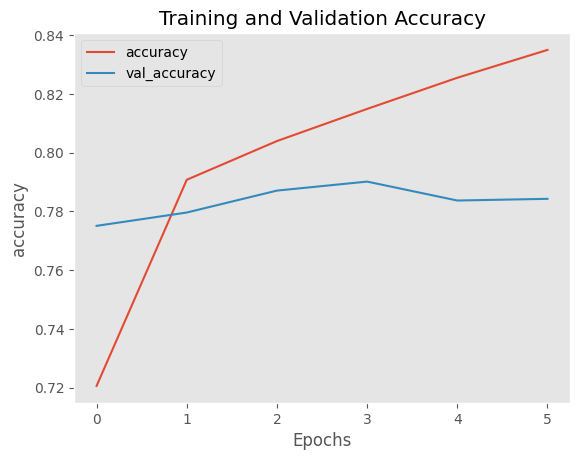

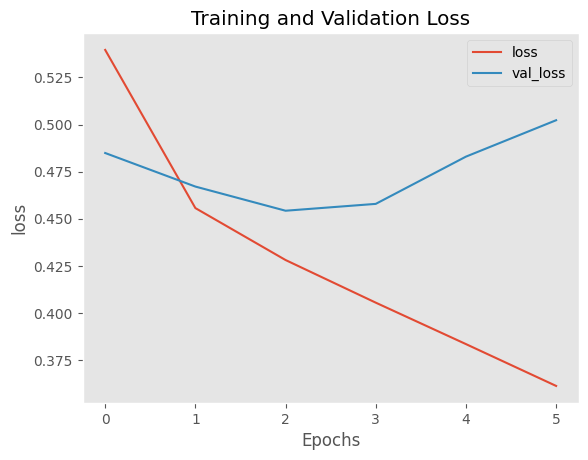

Plotting for model: GRU Model


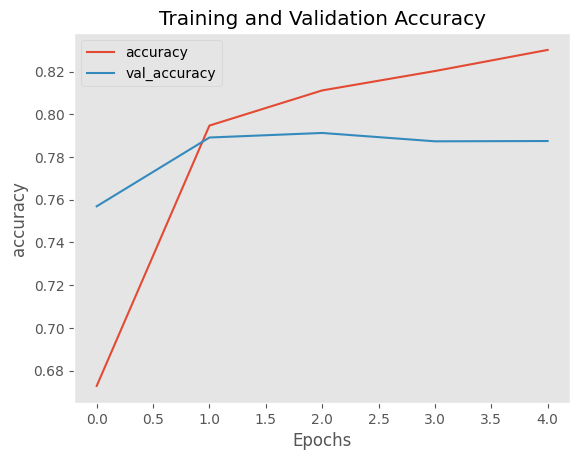

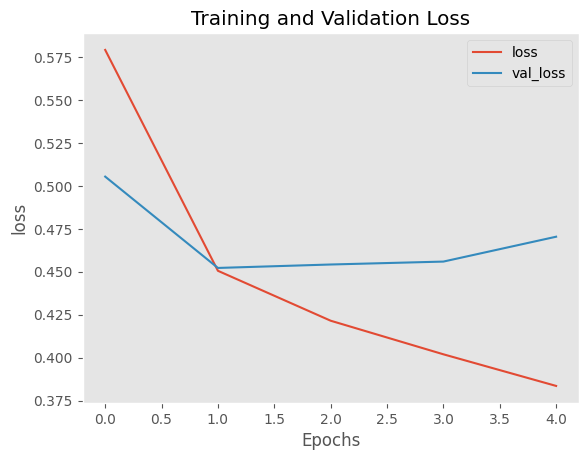

Plotting for model: Bidirectional GRU Model


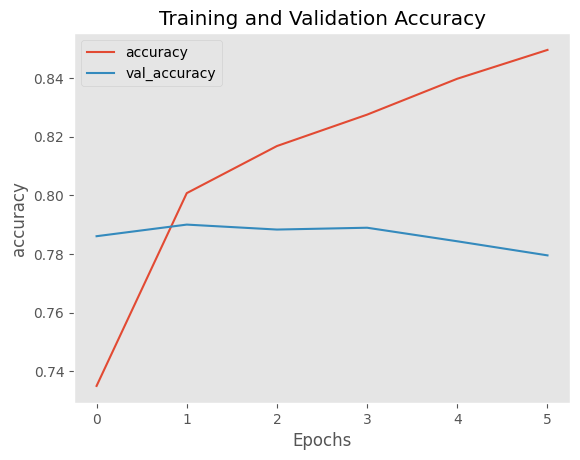

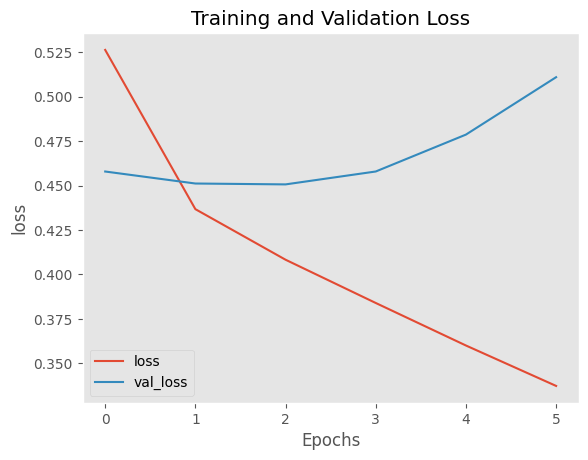

In [55]:
# Plot training and validation accuracy and loss for each model after fitting
for i, name in enumerate(model_names):
    print(f"Plotting for model: {name}")
    plot_graphs(histories[i], 'accuracy')
    plot_graphs(histories[i], 'loss')


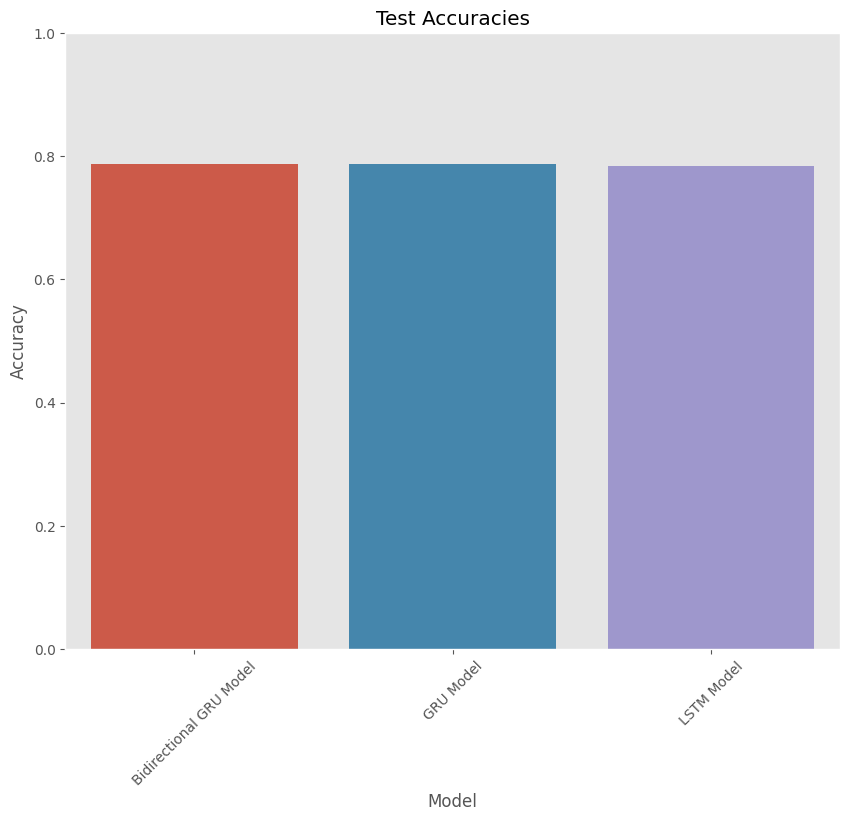

In [56]:
# Create a DataFrame for test accuracies
test_scores_df = pd.DataFrame({'Model': model_names,'Test Scores': test_accuracies}).sort_values(by='Test Scores', ascending=False)

# Plotting the test accuracies using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='Test Scores', data=test_scores_df)
plt.title('Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

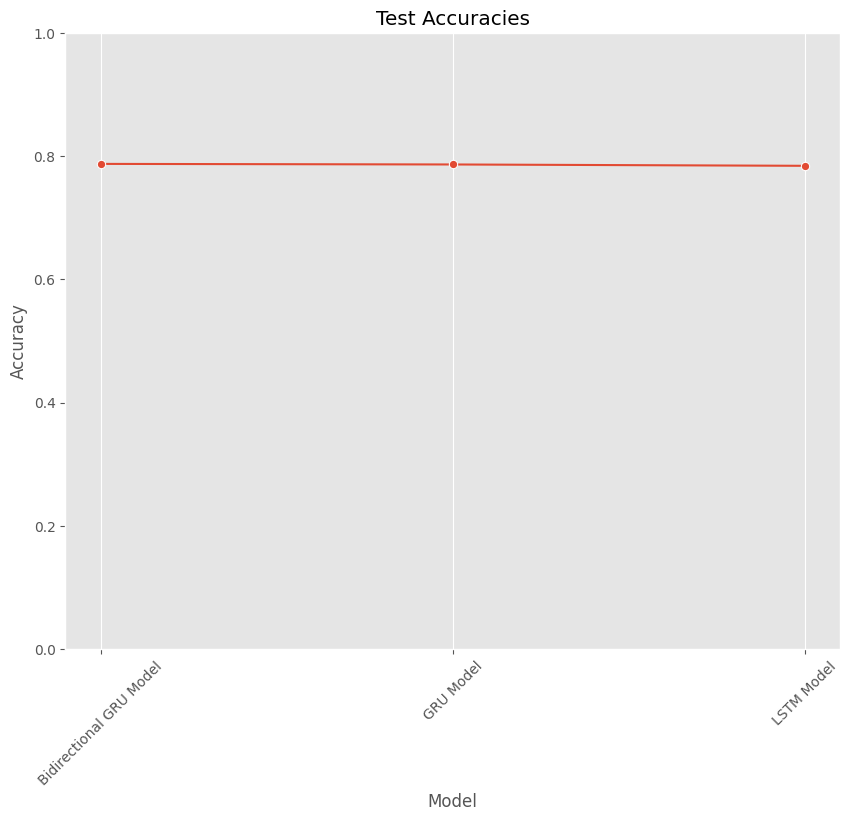

In [57]:
# Plotting the test accuracies using seaborn
plt.figure(figsize=(10, 8))
sns.lineplot(x='Model', y='Test Scores', data=test_scores_df, marker='o')
plt.title('Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()